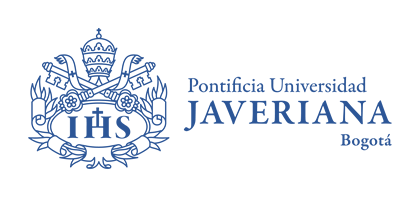

#**Proyecto Imágenes - Entrega 2 - Procesamiento de Imágenes y Videos**

###**Realizado por:**

- Carlos Másmela
- Yudy Pedraza

###**Resumen:**

El siguiente Notebook tiene como propósito mostrar la solución al problema de segmentación de tumores cerebrales con base en lo aprendido en la clase de Procesamiento de Imágenes y Videos


# **Librerías**

In [ ]:
import os
import cv2
import scipy
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab.patches import cv2_imshow

In [ ]:
!git clone https://github.com/candemas97/tumores_cerebrales/

Cloning into 'tumores_cerebrales'...
remote: Enumerating objects: 6748, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 6748 (delta 1), reused 9 (delta 1), pack-reused 6739
Receiving objects: 100% (6748/6748), 199.78 MiB | 33.06 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (7026/7026), done.


# **Lectura de data**

In [ ]:
ruta_local_training_glioma = '/content/tumores_cerebrales/Imágenes Cerebrales/Training/glioma'
ruta_local_training_meningioma = '/content/tumores_cerebrales/Imágenes Cerebrales/Training/meningioma'
ruta_local_training_pituitary = '/content/tumores_cerebrales/Imágenes Cerebrales/Training/pituitary'
ruta_local_training_notumor = '/content/tumores_cerebrales/Imágenes Cerebrales/Training/notumor'

In [ ]:
def leer_archivos_en_ruta(ruta: str) -> list:
  """
  Función encargada de leer todos los archivos que contiene cada carpeta
  """
  archivos = os.listdir(ruta)
  nombre_seccion = ruta.split("/")[-1]
  print(f"Cantidad de archivos - {nombre_seccion}: {len(archivos)}")
  print(f"{archivos[:5]}\n")
  return archivos

In [ ]:
#Leer y revisar archivos
archivos_glioma = leer_archivos_en_ruta(ruta_local_training_glioma)
archivos_meningioma = leer_archivos_en_ruta(ruta_local_training_meningioma)
archivos_pituitary = leer_archivos_en_ruta(ruta_local_training_pituitary)
archivos_notumor = leer_archivos_en_ruta(ruta_local_training_notumor)

Cantidad de archivos - glioma: 1321
['Tr-gl_0151.jpg', 'Tr-gl_0870.jpg', 'Tr-gl_0724.jpg', 'Tr-gl_1046.jpg', 'Tr-gl_1014.jpg']

Cantidad de archivos - meningioma: 1339
['Tr-me_1079.jpg', 'Tr-me_1062.jpg', 'Tr-me_0741.jpg', 'Tr-me_0271.jpg', 'Tr-me_0429.jpg']

Cantidad de archivos - pituitary: 1457
['Tr-pi_1276.jpg', 'Tr-pi_0211.jpg', 'Tr-pi_0649.jpg', 'Tr-pi_0226.jpg', 'Tr-pi_1403.jpg']

Cantidad de archivos - notumor: 1595
['Tr-no_0110.jpg', 'Tr-no_1304.jpg', 'Tr-no_0083.jpg', 'Tr-no_1381.jpg', 'Tr-no_1440.jpg']



In [ ]:
ejemplo_glioma = ruta_local_training_glioma +"/"+ archivos_glioma[70] #500
ejemplo_meningioma = ruta_local_training_meningioma +"/"+ archivos_meningioma[10]
ejemplo_pituitary = ruta_local_training_pituitary + "/" + archivos_pituitary[200]
ejemplo_notumor = ruta_local_training_notumor + "/" + archivos_notumor[1010] #39 #144

# **Segmentación por Color**

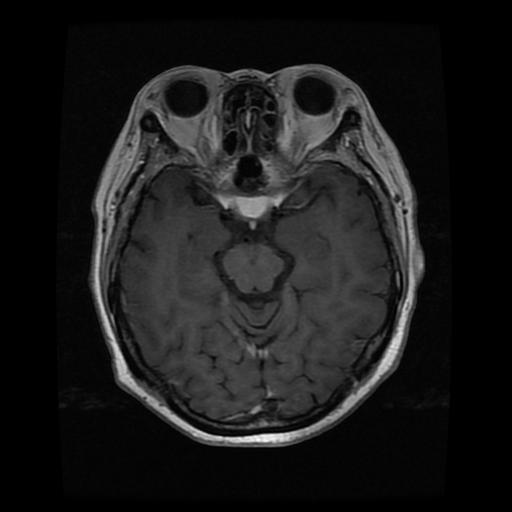

In [ ]:
imagen = cv2.imread(ejemplo_meningioma)
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
cv2_imshow(imagen)

In [ ]:
cv2.imwrite("tumor.png", imagen)

True

In [ ]:
# Extraer los canales H, S y V
R, G, B = cv2.split(imagen)

# Crear máscaras en el espacio de color HSV
Sr = np.where((R > 140) & (R < 180), 1, 0)
Sg = np.where((G > 140) & (G < 180), 1, 0)
Sb = np.where((B > 140) & (B < 180), 1, 0)

S = np.array(Sr * Sg * Sb) #Se unifica todo en un sólo canal
print(S)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
fig = px.imshow(S, color_continuous_scale="gray")

plt.figure(figsize=(8, 4))
fig.update_layout(
    coloraxis_showscale=False,
    height = imagen.shape[0],
    width = imagen.shape[1],
)
fig.show()

<Figure size 800x400 with 0 Axes>

In [ ]:
S_relleno = scipy.ndimage.binary_closing(S, np.ones((15,15)))
fig = px.imshow(S_relleno, color_continuous_scale="gray")

fig.update_layout(
    coloraxis_showscale=False,
    height = imagen.shape[0],
    width = imagen.shape[1],
)

fig.show()

In [ ]:
IX = (S_relleno * 255).astype(np.uint8)
contorno, _ = cv2.findContours(IX, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
H, W = S.shape
S_Contorno = np.zeros((H, W))

for i in range(len(contorno)):
    for j in range(len(contorno[i])):
        for k in range(len(contorno[i][j])):
            y_, x_ = contorno[i][j][k]
            S_Contorno[x_, y_] = 1



fig = px.imshow(S_Contorno, color_continuous_scale="gray")
fig.update_layout(
    coloraxis_showscale=False,
    height=imagen.shape[0],
    width=imagen.shape[1],
)
fig.show()

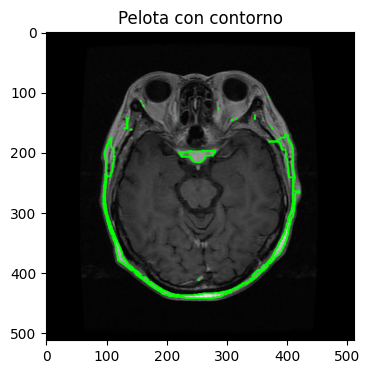

In [ ]:
# Dibujar el contorno en la imagen original
contour_image = imagen.copy()  # Crear una copia de la imagen original
cv2.drawContours(contour_image, contorno, -1, (0, 255, 0), 2)  # Dibujar el contorno en verde

# Mostrar la imagen con el contorno
plt.figure(figsize=(8, 4))
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Fronteras')
plt.show()

Coordenadas: (221, 197, 281, 216)


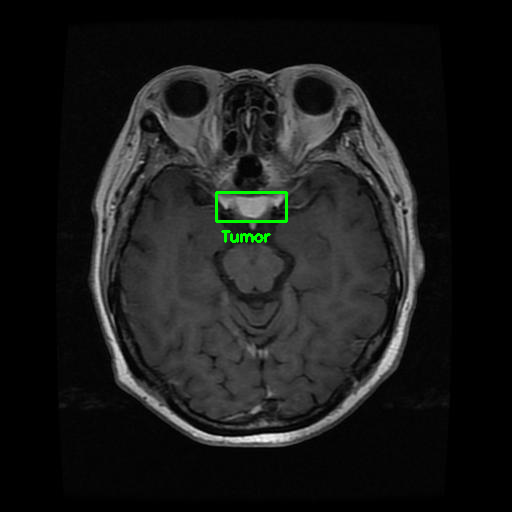

In [ ]:
# Encuentra contornos en la imagen
contours, _ = cv2.findContours(IX, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Inicializa variables para el contorno más pequeño y su área
smallest_contour = None
smallest_area = float('inf')

# Itera a través de los contornos y encuentra el más pequeño
for contour in contours:
    area = cv2.contourArea(contour)
    if area < smallest_area and area > 500:
        smallest_area = area
        smallest_contour = contour

# Dibuja el contorno más pequeño en una copia de la imagen original
image_with_smallest_contour = imagen.copy()

min_x = float('inf')
min_y = float('inf')
max_x = 0
max_y = 0

#Se buscan las coordenadas encontradas
for point in smallest_contour:
    x, y = point[0]
    if x < min_x: min_x = x
    if y < min_y: min_y = y
    if x > max_x: max_x = x
    if y > max_y: max_y = y
print(f'Coordenadas: ({min_x}, {min_y}, {max_x}, {max_y})')

cv2.rectangle(image_with_smallest_contour,
              (min_x - 5, min_y - 5),
              (max_x + 5, max_y + 5),
              (0,255,0),
              2
              )

cv2.putText(image_with_smallest_contour,
            "Tumor",
            (min_x, max_y+25),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (0, 255, 0),
            2)

# Muestra la imagen con el contorno más pequeño
cv2_imshow(image_with_smallest_contour)
cv2.waitKey(0)
cv2.destroyAllWindows()

# **Segmentación kmeans**

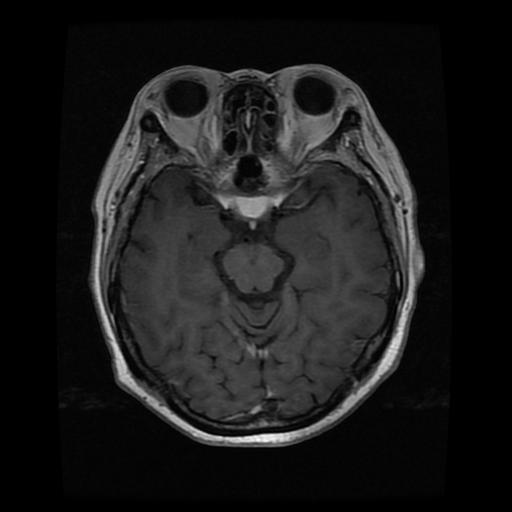

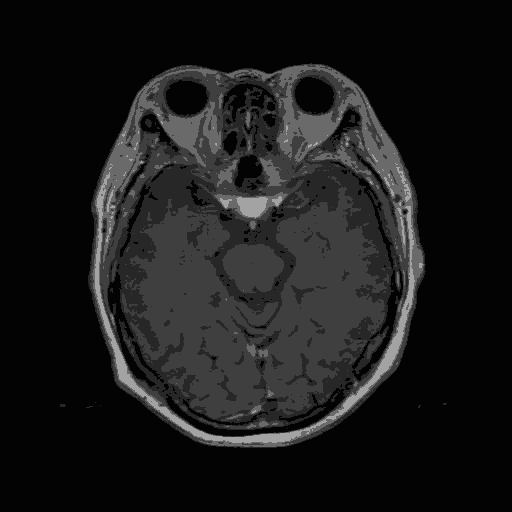

-1

In [ ]:
# Importamos las librerías necesarias. En este caso, las dos más importantes son Numpy y OpenCV.

import cv2
import numpy as np

# Cargamos la imagen de entrada.
image = cv2.imread(ejemplo_meningioma)

# Creamos una copia para poderla manipular a nuestro antojo.
image_copy = np.copy(image)

# Mostramos la imagen y esperamos que el usuario presione cualquier tecla para continuar.
cv2_imshow(image)
cv2.waitKey(0)

# Convertiremos la imagen en un arreglo de ternas, las cuales representan el valor de cada pixel. En pocas palabras,
# estamos aplanando la imagen, volviéndola un vector de puntos en un espacio 3D.
pixel_values = image_copy.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Abajo estamos aplicando K-Means. Como siempre, OpenCV es un poco complicado en su sintaxis, así que vamos por partes.

# Definimos el criterio de terminación del algoritmo. En este caso, terminaremos cuando la última actualización de los
# centroides sea menor a *epsilon* (cv2.TERM_CRITERIA_EPS), donde epsilon es 1.0 (último elemento de la tupla), o bien
# cuando se hayan completado 10 iteraciones (segundo elemento de la tupla, criterio cv2.TERM_CRITERIA_MAX_ITER).
stop_criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Este es el número de veces que se correrá K-Means con diferentes inicializaciones. La función retornará los mejores
# resultados.
number_of_attempts = 20

# Esta es la estrategia para inicializar los centroides. En este caso, optamos por inicialización aleatoria.
centroid_initialization_strategy = cv2.KMEANS_RANDOM_CENTERS

# Ejecutamos K-Means con los siguientes parámetros:
# - El arreglo de pixeles.
# - K o el número de clusters a hallar.
# - None indicando que no pasaremos un arreglo opcional de las mejores etiquetas.
# - Condición de parada.
# - Número de ejecuciones.
# - Estrategia de inicialización.
#
# El algoritmo retorna las siguientes salidas:
# - Un arreglo con la distancia de cada punto a su centroide. Aquí lo ignoramos.
# - Arreglo de etiquetas.
# - Arreglo de centroides.
_, labels, centers = cv2.kmeans(pixel_values,
                                5,
                                None,
                                stop_criteria,
                                number_of_attempts,
                                centroid_initialization_strategy)

# Aplicamos las etiquetas a los centroides para segmentar los pixeles en su grupo correspondiente.
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# Debemos reestructurar el arreglo de datos segmentados con las dimensiones de la imagen original.
segmented_image = segmented_data.reshape(image_copy.shape)

# Mostramos la imagen segmentada resultante.
cv2_imshow(segmented_image)
cv2.waitKey(0)

In [ ]:
cv2.imwrite("tumor_2.png", segmented_image)

True

# **Segmentacion por bordes**

In [ ]:
import matplotlib.pylab as plt
import cv2
import numpy as np
from skimage.morphology import binary_dilation
from skimage.segmentation import clear_border,find_boundaries
from skimage.morphology import disk
from skimage.feature import canny

In [ ]:
from skimage.color import label2rgb
from skimage.measure import label

# (c) Christian Pieringer and Domingo Mery

def binview(img, mask, color='r', dilate_pixels=1):
    """
    Displays a gray or color image 'img' overlaid by color pixels determined a by binary image 'mask'. It is useful to
    display the edges of an image.

    Args:
        img: gray scale image (X-ray)
        mask: binary image that works as mask
        color: string to define pixel color.
                'r': red (default)
                'g': green
                'b': blue
                'y': yellow
                'c': cyan
                'm': magenta
                'k': black
                'w': white

        dilate_pixels (int): Number of pixels used for dilate the mask.

    Returns:
        img_color (ndarray): output image with a mask overlaid.
    """

    # Defines colors
    # colors = {
    #     'r': np.array([255, 0, 0]),
    #     'g': np.array([0, 255, 0]),
    #     'b': np.array([0, 0, 255]),
    #     'y': np.array([255, 255, 0]),
    #     'c': np.array([0, 255, 255]),
    #     'm': np.array([255, 0, 255]),
    #     'k': np.array([0, 0, 0]),
    #     'w': np.array([255, 255, 255])
    # }
    #
    colors = {
        'r': np.array([1, 0, 0]),
        'g': np.array([0, 1, 0]),
        'b': np.array([0, 0, 1]),
        'y': np.array([1, 1, 0]),
        'c': np.array([0, 1, 1]),
        'm': np.array([1, 0, 1]),
        'k': np.array([0, 0, 0]),
        'w': np.array([1, 1, 1])
    }
    # Create a RGB image from grayscale image.
    img_color = np.dstack((img, img, img))

    # Ensure do not modify the original color image and the mask
    img_color = img_color.copy()

    mask_ = mask.copy()
    # mask_ = dilate(mask_, np.ones((g, g), np.uint8))
    mask_ = binary_dilation(mask_, np.ones((dilate_pixels, dilate_pixels)))

    # Now black-out the area of the mask
    # img_fg = bitwise_and(img, img, mask=mask_)

    # Defines the pixel color used for the mask in the figure.
    cc = colors[color]
    #
    # for i in range(3):
    #     img_color[:, :, i] = cc[i] * img_fg

    # remove artifacts connected to image border
    cleared = clear_border(mask_)
    if np.all(cleared):
        mask_ = cleared

    # label image regions
    label_image = label(mask_)
    img_color = label2rgb(label_image, image=img_color, colors=[cc], bg_label=0)

    return img_color  # add(img_color, img_color)

In [ ]:
class Edge:
    """
    This class implements methods for edge detection required for examples used
    in the book.
    """

    def __init__(self, _method, _thres=None, _sigma=1.0):
        """
        Args:
            method (str): It defines the detector method:
                'log': Laplacian of Gaussian
                'canny': Canny edge detection
            thres (float): It defines the threshold to noise supression
            sigma (float): It specifies the scale of the kernel
        """

        _valid_methods = ['log', 'canny', 'sobel']

        super().__init__()

        # Check input parameters
        if _method not in _valid_methods:
            raise ValueError('{} is not a valid method for edge detection.'.format(_method))

        self.method = _method
        self.thres = _thres
        self.sigma = _sigma
        self._returns = None  # Keep track outputs

    def detect_zero_crossing(self, edges):
        """
        Performs zero crossing detection.

        Args:
            edges (float ndarray): input image in edges

        Return:
            out_img (ndarray): image of edges.
        """

        # def any_neighbor_zero(img, i, j):
        #     """
        #     This function verifies neighborhood around boundary pixels.
        #
        #     """
        #     for k in range(-1, 2):
        #         for l in range(-1, 2):
        #             if img[i + k, j + k] == 0:
        #                 return True
        #     return False
        #
        # # Makes a copy of the original image and
        # # marks as 1 pixels greater that 0.
        # _edges = edges.copy()
        # _edges[_edges > self.thres] = 1
        # _edges[_edges <= self.thres] = 0
        #
        # # _edges = np.abs(_edges)
        # # _edges = _edges > self.thres
        #
        # # print(np.max(_edges), np.min(_edges))
        #
        # out_img = np.zeros(_edges.shape)
        #
        # for i in range(1, _edges.shape[0] - 1):
        #     for j in range(1, _edges.shape[1] - 1):
        #         if _edges[i, j] > 0 and any_neighbor_zero(_edges, i, j):
        #             out_img[i, j] = 1

        # Check zero crossing four directions and aggregate the output.
        out = np.diff(np.sign(edges), prepend=np.ones((edges.shape[0], 1)), axis=1) != 0
        out = np.bitwise_or(out, np.diff(np.sign(edges), prepend=np.ones((1, edges.shape[1])), axis=0) != 0)
        out = np.bitwise_or(out, (np.diff(np.sign(edges)[:, ::-1], prepend=np.ones((1, edges.shape[1])), axis=0) != 0)[:, ::-1])
        out = np.bitwise_or(out, (np.diff(np.sign(edges)[::-1, :], prepend=np.ones((1, edges.shape[1])), axis=0) != 0)[::-1, :])
        # Check gradients is on the threshold.

        grads_diff = np.abs(np.diff(edges, prepend=np.ones((edges.shape[0], 1)), axis=1)) > self.thres
        grads_diff = np.bitwise_or(grads_diff, np.abs(np.diff(edges, prepend=np.ones((1, edges.shape[0])), axis=0)) > self.thres)
        # grads_diff = np.bitwise_or(grads_diff, (np.abs(
        #     np.diff(edges[:, ::-1], prepend=np.ones((edges.shape[0], 1)),
        #             axis=1)) > self.thres)[:, ::-1])
        # grads_diff = np.bitwise_or(grads_diff, (np.abs(
        #     np.diff(edges[::-1, :], prepend=np.ones((1, edges.shape[0])),
        #             axis=0)) > self.thres)[::-1, :])

        out_img = np.bitwise_and(out, grads_diff)

        return out_img

    def fit(self, img):
        """
        This method detect edges in an image. Method must be choose during class
        instantiation.

        Args:
            img: input image in numpy array format.

        Returns:
            None
        """

        self._returns = dict()
        self._returns.update({'edges': None})

        if self.method == 'log':
            _ksize = int(2 * np.ceil(3 * self.sigma) + 1)
            _log_kernel = fspecial(self.method, _ksize, self.sigma)
            _log = cv2.filter2D(img.astype('double'), cv2.CV_64F, _log_kernel)
            _log = _log / np.sum(_log.flatten())  # Normalize gradients to sum 0
            _edges = self.detect_zero_crossing(_log)

            self._returns.update({'kernel': _log_kernel})  # Keep used kernel

        elif self.method == 'canny':
            """
            Canny edge detector. This option implement a wrapper to apply the
            scikit image implementation for this edge detector. It present an
            interface with similar parameters to the MATLAB version.
            """
            _edges = canny(
                img.astype('double'),
                sigma=self.sigma,
                low_threshold=self.thres,
                high_threshold=self.thres / 0.4
            )

        # Keep the output if does exists
        self._returns.update({'edges': _edges})

    @property
    def edges(self):
        return self._returns['edges']

    @property
    def kernel(self):
        return self._returns['kernel'] if self.method != 'canny' else None

In [ ]:
def prewitt_kernel(size=3, *args):
    """
    This function create a Prewitt Kernel. The default size is 3 x 3 kernel.
    :param size:
    :param args:
    :return:
    """

    prewitt = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype='double')
    return prewitt


def sobel_kernel(size=3, *args):
    """
    This method create a Sobel Kernel. The standar size is a 3 x 3 kernel.

    :param size: int value to define the kernel size.

    :return:
    """

    sobel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype='double')
    return np.transpose(sobel)


def gaussian_kernel(size, sigma, *args):
    """
    This method creates a symmetric Gaussian kernel.

    :param sigma: float number that defines the width of the Gaussian
            distribution
    :param size: inf number to specify the size of the kernel.
            Typical numbers 3, 5, 9, 11.
    """
    x, y = np.mgrid[-size // 2 + 1:size // 2 + 1,
           -size // 2 + 1:size // 2 + 1]

    kernel = np.exp(-((x ** 2 + y ** 2) / (2.0 * sigma ** 2)))
    kernel = kernel / kernel.sum()

    return kernel.astype('double')


def log_kernel(size, sigma, *args):
    """
    This option creates a Laplacian of Gaussian Kernel centered at
    the middle of the kernel

    :param size: integer value to define the size of the kernel.
    :param sigma: float value for the scale factor.
    :returns: a numpy array with the LoG kernel.

    """

    x, y = np.meshgrid(np.arange(-size - 1 / 2 + 1, size - 1 / 2 + 1),
                       np.arange(-size - 1 / 2 + 1, size - 1 / 2 + 1))

    # LoG filter
    # normal = -1.0 / (2.0 * np.pi * sigma ** 2)

    # kernel = ((x ** 2 + y ** 2 - (2.0 * sigma ** 2)) / sigma ** 4)
    # kernel = kernel * np.exp(-(x ** 2 + y ** 2) / (2.0 * sigma ** 2))
    # kernel = kernel / normal

    kernel = x ** 2 + y ** 2
    kernel = (-1 / (np.pi * sigma ** 4)) * (
                1 - kernel / (2 * sigma ** 2)) * np.exp(
        -kernel / (2 * sigma ** 2))

    # Normalize ensuring 0 DC. See Peter Kovesi's Toolbox
    kernel = kernel - np.mean(kernel.flatten())

    return kernel


In [ ]:
def fspecial(kernel_name, size=3, sigma=1.0):
    """
    This method mimic the 'fspecial' gaussian MATLAB function to create
    special kernel functions used in computer vision.

    Reference: https://src-bin.com/en/q/1064ef9

    :param kernel_name: a string to define the type of window:
                'sobel': Sobel kernel
                'prewitt': Prewitt kernel
                'gaussian': standard Gaussian window
                'log': Laplacian of Gaussian Kernel

    :param size: integer to define the length of the window
    :param sigma: a float number to define the sigma of the kernel
    """

    _kernel_kwarg = {
        'sobel': sobel_kernel,
        'prewitt': prewitt_kernel,
        'gaussian': gaussian_kernel,
        'log': log_kernel
    }

    # _img_generate kernel function
    kernel = _kernel_kwarg[kernel_name](size, sigma)

    return kernel


In [ ]:
def im_grad(img, kernel):
    """
    This method compute the gradient of a image 'img'. It uses the OpenCV
    function "filter2D". In the filter function 'same' is the default and the
    only one option.

    :param img: a uint8 input image.
    :param kernel: a kernel as nd-array. Commonly used kernels are Prewitt,
                    _img_gaussians, or Sobel.

    :returns: The images of magnitude (mag) and angle (angle).

    """

    # TODO: check arguments

    gradi = cv2.filter2D(img.astype('double'), cv2.CV_64F, kernel)
    gradj = cv2.filter2D(img.astype('double'), cv2.CV_64F, kernel.T)

    mag = np.sqrt(gradi ** 2 + gradj ** 2)
    angle = np.arctan2(gradj, gradi)

    return mag, angle

def linimg(img, t=255):
    """
    This method computes the Linear enhancement of image I from 0 to 255,
    or 0 to 1.

    :param img: a grayvalue image I.
    :param t: if t==255 output will be a unit8 image with gray values going from
              0 to 255. Else, output will a double image with gray values from
              0 to t.

    :returns: enhanced image J (uint8 or double) so that:
                J = m*I + b; where min(J) = 0, max(J) = 255 or 1.

    """

    img = np.double(img.copy())
    mi = np.min(img.flatten())
    mx = np.max(img.flatten())
    d = mx - mi

    if d == 0:
        out = (img / mx) * (t / 2)
    else:
        out = ((img - mi) / d) * t

    if t == 255:
        out = np.round(out)

    return out.astype('uint8')



In [ ]:
def show_image_as_surface(img, cmap='viridis', elev=-120, azim=40, fsize=None, colorbar=False):
    """
    This function display a mesh plot of an image. This is not a 3D visualization.

    Args:
        img:
        cmap:
        elev:
        azim:

    Returns:
        None
    """
    # Create the x and y coordinate arrays
    xx, yy = np.mgrid[0:img.shape[0], 0:img.shape[1]]

    if not fsize:
        fsize = (8, 8)

    # create the figure
    fig = plt.figure(figsize=fsize)
    ax = fig.add_subplot(projection='3d')
    surf = ax.plot_surface(xx, yy, img,
                           rstride=1,
                           cstride=1,
                           cmap=cmap,
                           linewidth=0)
    ax.view_init(elev, azim)

    if colorbar:
        fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.01)
    ax.axis('off')
    plt.tight_layout()
    plt.show()


## ***Prewitt + Sobel + Gaussian***

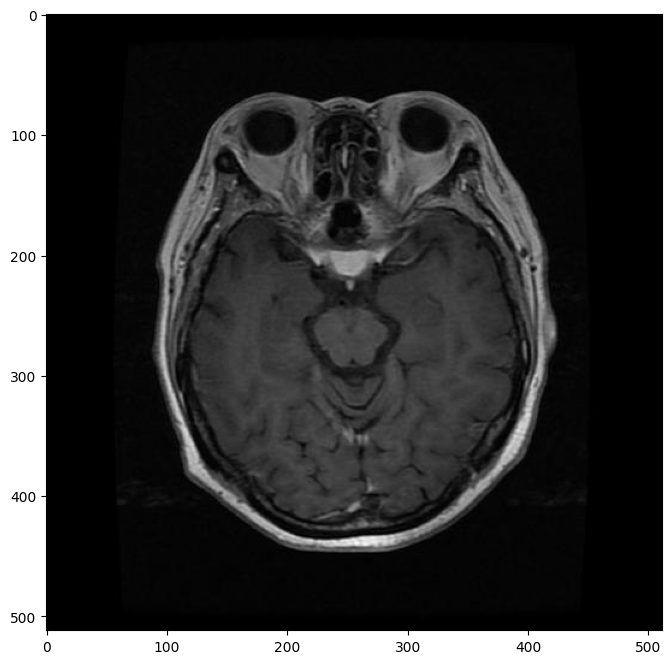

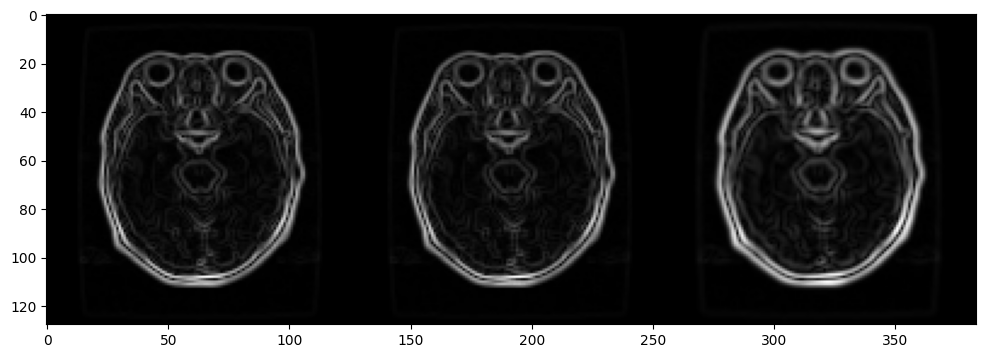

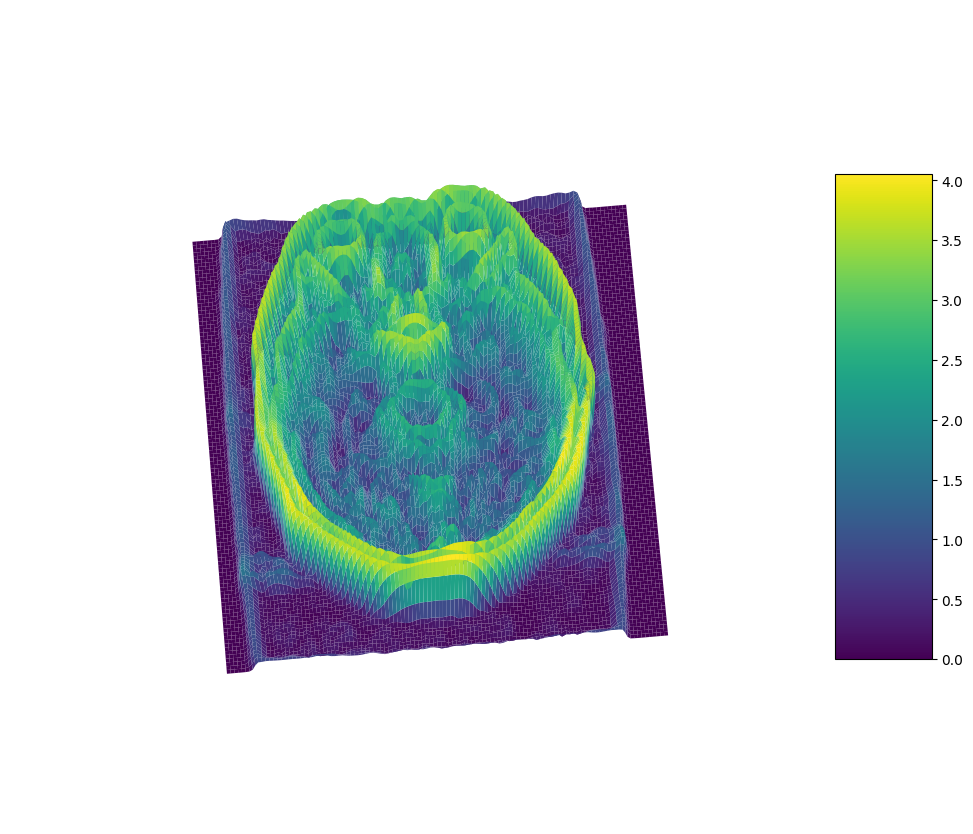

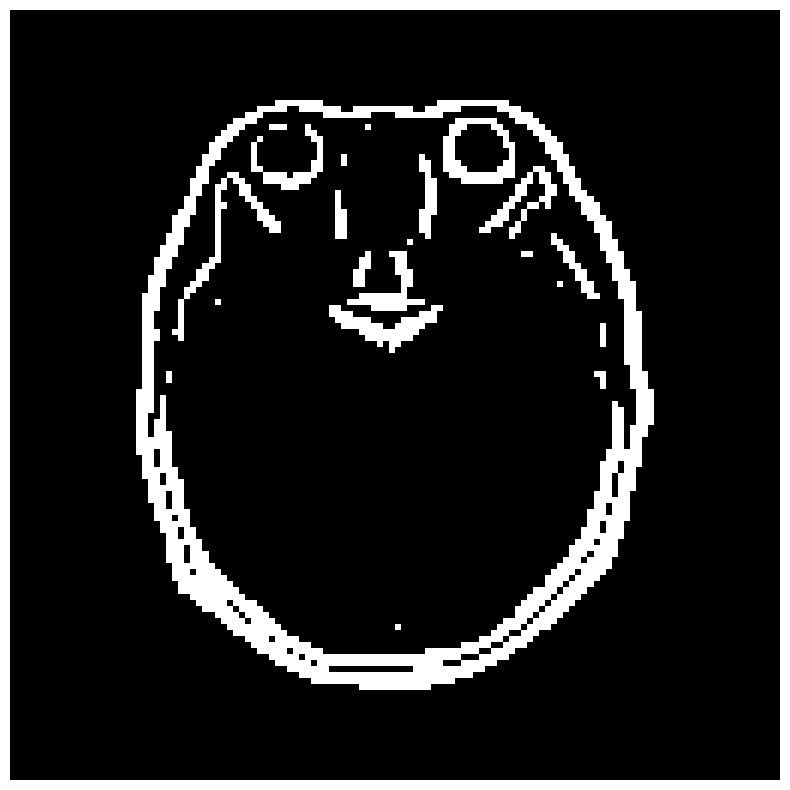

In [ ]:
X = cv2.imread(ejemplo_meningioma,0)
plt.figure(figsize=(14, 8))
plt.imshow(X,cmap = 'gray')
plt.show()

img = cv2.resize(X, None, fx=0.25, fy=0.25, interpolation=cv2.INTER_AREA)

hs = fspecial('sobel')    # Sobel kernel
hp = fspecial('prewitt')  # Prewitt kernel

hg = fspecial('gaussian', 9, 1.0)
hg = cv2.filter2D(hg, cv2.CV_64F, np.array([-1, 1]))

gs, __ = im_grad(img, hs)
gp, __ = im_grad(img, hp)
gg, __ = im_grad(img, hg)

gradients = np.hstack([linimg(gs), linimg(gp), linimg(gg)])  # Stack the results as a same image.

plt.figure(figsize=(12, 6))
plt.imshow(gradients, cmap='gray')
plt.show()

img_y = np.log(gg + 1)

show_image_as_surface(img_y[-5:5:-1, -5:5:-1], elev=80, azim=-185, fsize=(10, 10), colorbar=True)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(img_y > 3, cmap='gray')
ax.axis('off')
plt.show()


## ***LoG***

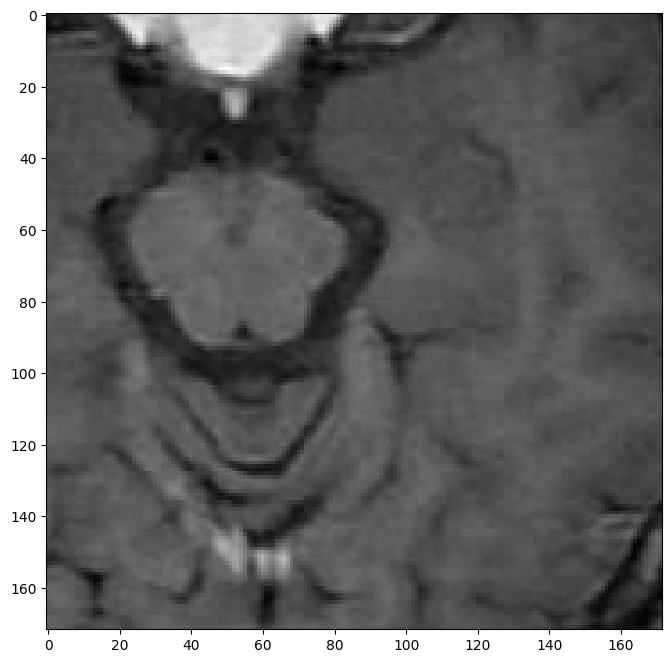

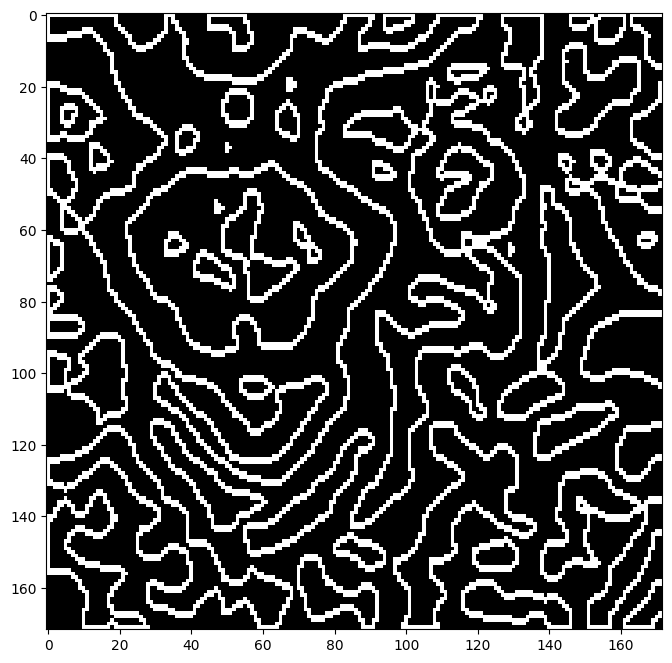

In [ ]:
X = cv2.imread(ejemplo_meningioma,0)
X = X[200:372, 200:372]  # Cropping the image
plt.figure(figsize=(14, 8))
plt.imshow(X,cmap = 'gray')
plt.show()
sigma = 3
edge = Edge('log', 1e-8, sigma)  # Edge detection using log
edge.fit(X)

b = edge.edges.astype(np.uint8)
plt.figure(figsize=(14, 8))
plt.imshow(b,cmap='gray')
plt.show()

## ***Canny***

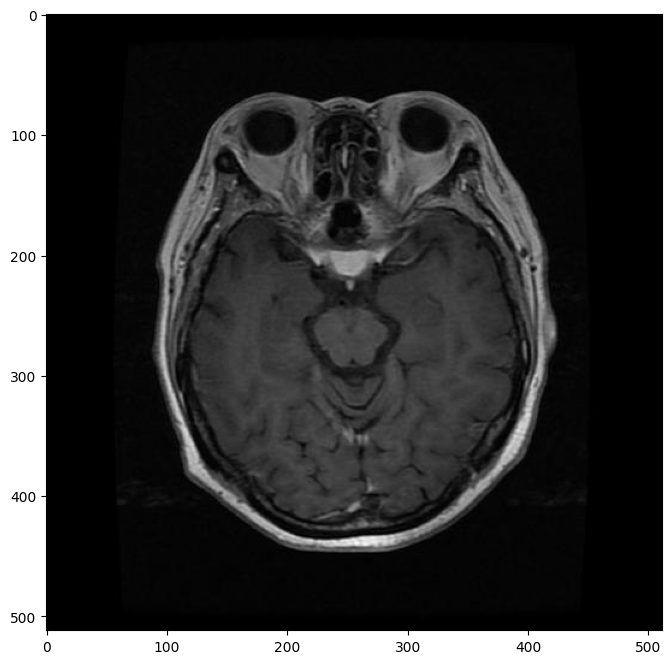

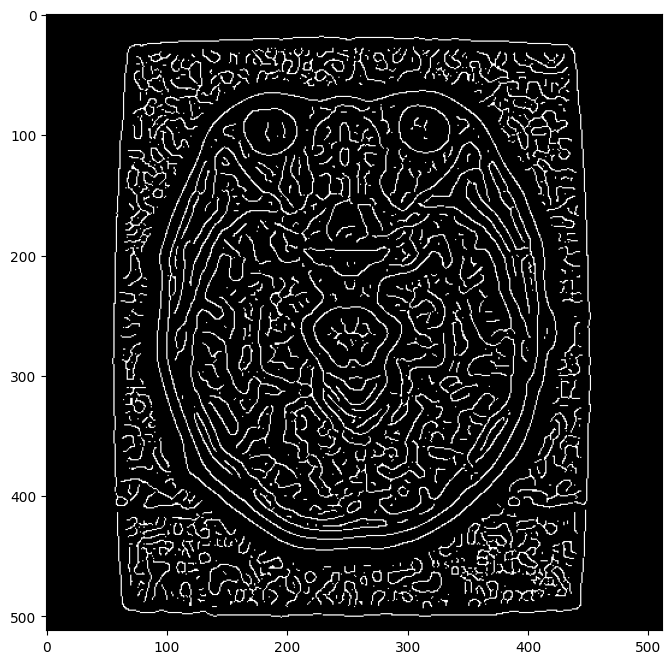

In [ ]:
X = cv2.imread(ejemplo_meningioma,0)
X = X#[0:572, 0:572]  # Cropping the image
plt.figure(figsize=(14, 8))
plt.imshow(X,cmap = 'gray')
plt.show()
sigma = 3
edge = Edge('canny', 1e-8, sigma)  # Edge detection using log
edge.fit(X)

b = edge.edges.astype(np.uint8)
plt.figure(figsize=(14, 8))
plt.imshow(b,cmap='gray')
plt.show()

## ***Segmentacion usando LoG***

In [ ]:
def seg_log_feature(_img, _mask=None, area=None, gray=None, contrast=None, sigma=None):
    """

    """
    if _mask.all():
        _mask = np.ones(_img.shape)

    # Unpackage parameters
    amin = area[0]
    amax = area[1]
    gmin = gray[0]
    gmax = gray[1]
    cmin = contrast[0]
    cmax = contrast[1]

    se = disk(3)  # Structural element
    re = binary_dilation(_mask, se)

    e = clear_border(find_boundaries(_mask, connectivity=1, mode='inner')).astype(np.uint8)
    edge = Edge('log', 1e-8, sigma)  # Edge detection using log
    edge.fit(_img)

    b = edge.edges.astype(np.uint8)
    b = np.bitwise_and(b, re)
    b = np.bitwise_or(b, e)
    b = clear_border(np.bitwise_not(b))

    f, m = label(b, connectivity=1, return_num=True)  # Connectivity=1 == 4 Neighboors

    d = np.zeros(_img.shape).astype(np.uint8)

    for i in range(m):
        r = f == i
        b = np.bitwise_xor(r, binary_dilation(r, np.ones((17, 17)))).astype(np.uint8)
        ir = r == 1
        ib = b == 1
        area = np.sum(ir.flatten())
        gray_r = np.mean(_img[ir].flatten())
        gray_b = np.mean(_img[ib].flatten())
        contrast = gray_r / gray_b

        if (area >= amin) and (area <= amax) and (gray_r >= gmin) and (gray_r <= gmax) and (contrast >= cmin) and (contrast <= cmax):
            d = np.bitwise_or(d, r)

    f, m = label(d, connectivity=1, return_num=True)  # Connectivity=1 == 4 Neighboors

    return f, m


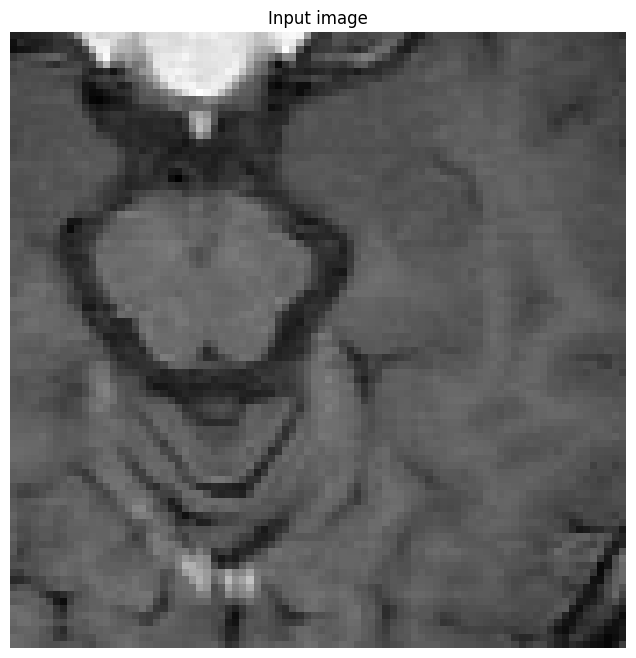

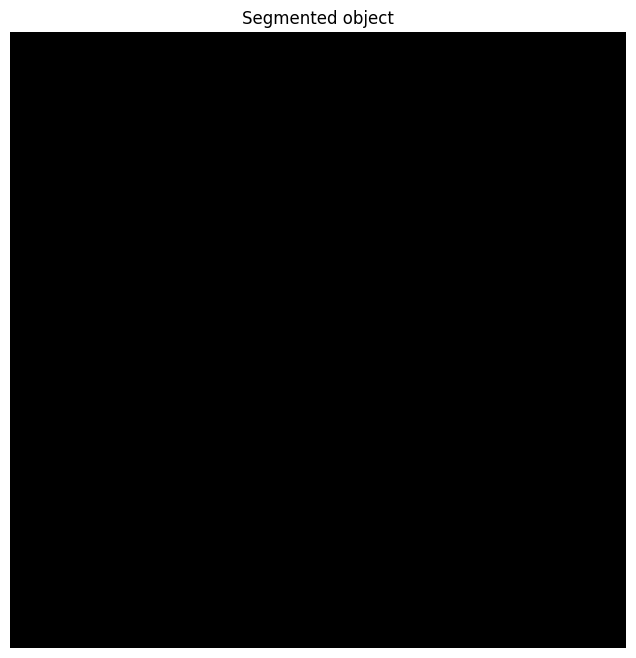

Found 1 regions.


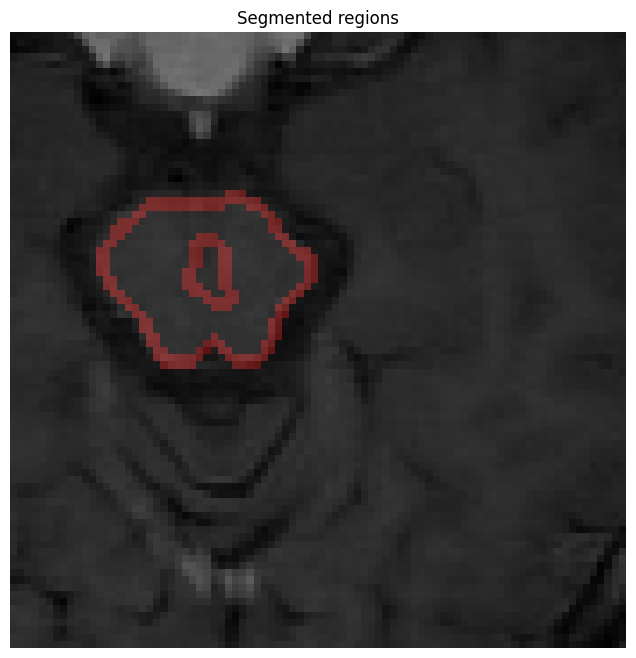

In [ ]:
X = cv2.imread(ejemplo_meningioma,0)
X = X[200:372:2, 200:372:2]  # Donwsampling the image

fig1, ax1 = plt.subplots(1, 1, figsize=(8, 8))
ax1.imshow(X, cmap='gray')
ax1.set_title('Input image')
ax1.axis('off')
plt.show()

R = X < 240

fig2, ax2 = plt.subplots(1, 1, figsize=(8,8))
ax2.imshow(R, cmap='gray')
ax2.set_title('Segmented object')
ax2.axis('off')
plt.show()

options = {
    'area': (30, 1500),  # Area range (area_min, area_max)
    'gray': (0, 150),  # Gray value range (gray_min, gray_max)
    'contrast': (1.08, 1.8),  # Contras range (cont_min, cont_max)
    'sigma': 2.5
}

Y, m = seg_log_feature(X, R, **options)

print(f'Found {m} regions.')

fig3, ax3 = plt.subplots(1, 1, figsize=(8, 8))
ax3.imshow(binview(X, find_boundaries(Y)), cmap='gray')
ax3.set_title('Segmented regions')
ax3.axis('off')
plt.show()

fig4, ax4 = plt.subplots(1, 1, figsize=(10, 10))
ax4.imshow(X, cmap='gray')
ax4 = plot_bboxes(bboxes, ax=ax4)
ax4.set_title('Bounding Boxes')
ax4.axis('off')
plt.show()

# **Segmentacion Watershed**

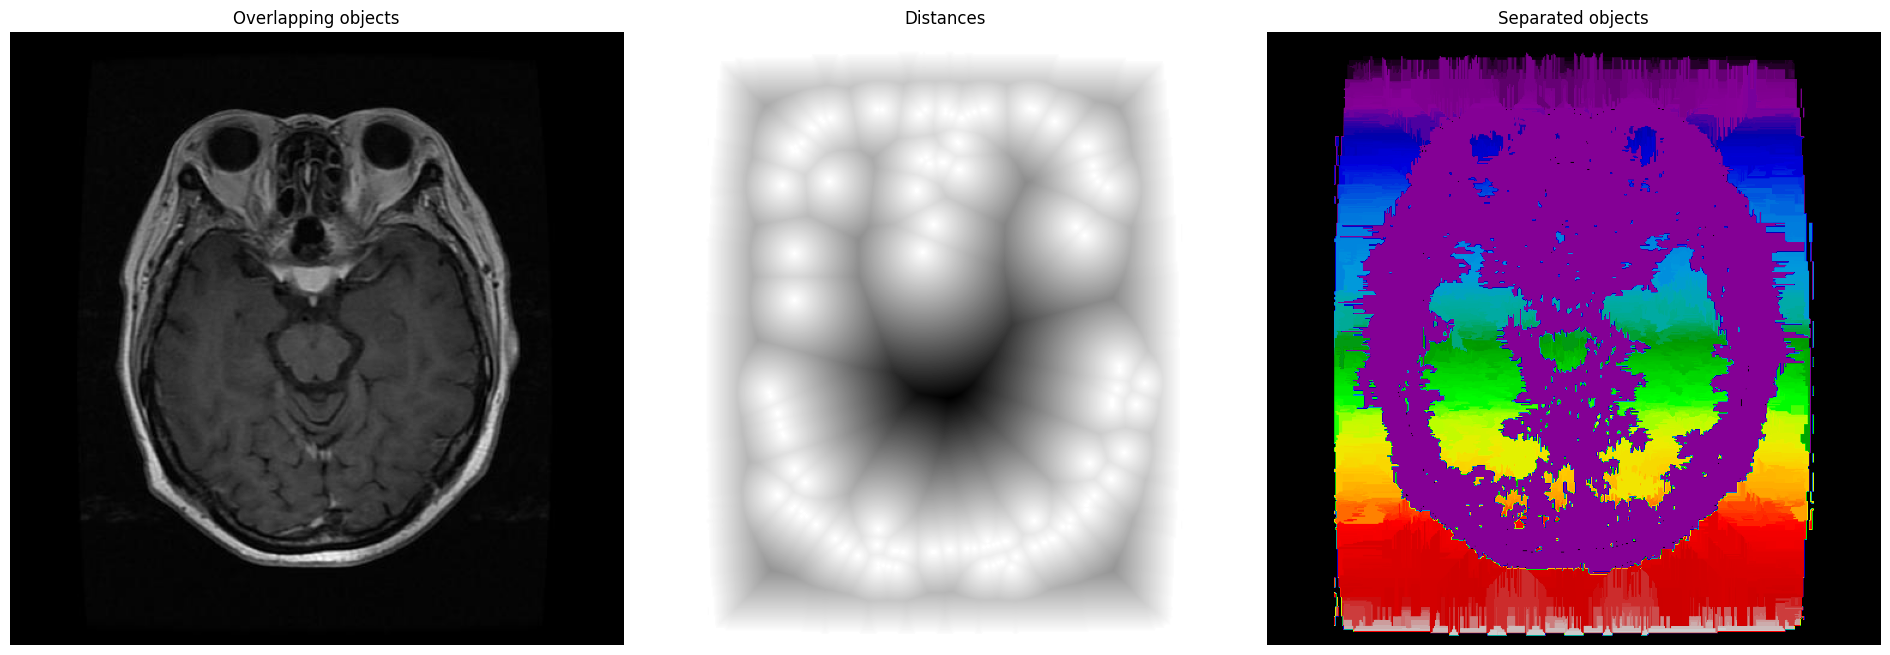

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max


# Generate an initial image with two overlapping circles
N    = 80
x, y = np.indices((N,N))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = cv2.imread(ejemplo_meningioma,0)

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=image)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)
labels = watershed(-distance, markers, mask=image)

# Removing infinity
D = -distance
t = N
D[D>t] = - 1
D[D==-1] = np.max(D)


fig, axes = plt.subplots(ncols=3, figsize=(19, 7), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(D, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()


# **MSER**

In [ ]:
import matplotlib.pylab as plt
import cv2
import numpy as np
from skimage.morphology import binary_dilation
from skimage.segmentation import clear_border,find_boundaries
from skimage.morphology import disk
from skimage.filters import threshold_otsu, gaussian
from skimage.measure import find_contours
from skimage.morphology import remove_small_holes, remove_small_objects
from skimage.filters import threshold_otsu, gaussian
from skimage.measure import find_contours
from skimage.morphology import binary_closing
from skimage.measure import label, regionprops

In [ ]:
def seg_mser(_img, area=(60, 20000), min_div=0.2, max_var=0.25, delta=5, area_threshold=200):
    """
    Image segmentation using MSER algorithm.

    Args:
        _img (ndarray): input image (uint8)
        area (int tuple): Range of areas to prune (min_area, max_area)
        min_div (float): Trace back to cut off MSER with diversity less than min_diversity
        max_var (float): Prune the area that have simliar size to its children
        delta (int): Controls how the stability is calculated comparing (sizei - sizei-delta) / sizei-delta. [1]
        area_threshold (float): the area threshold to cause re-initialize in color images [1]

    Returns:
       mask (ndarray): Binary image with detected objects
       label_regions (ndarray): Image with labels of the detected objects
       bboxes (ndarray): Bounding boxes for each detection in label_regions (x0, y0, width, height), where (x0, y0) is
                         the uppper-left corner.


    [1] Please check the OpenCV documentation for more details.
    """

    mser_opts = {
        'min_area': area[0],
        'max_area': area[1],
        'max_variation': max_var,
        'min_diversity': min_div,
        'delta': delta,
        'area_threshold': area_threshold
    }

    mser = cv2.MSER_create(**mser_opts)
    regions, bbox = mser.detectRegions(_img)

    mask = np.zeros(_img.shape)

    for dd, region in enumerate(regions):
        mask[region[:,1], region[:,0]] = 1

    label_regions, m = label(mask, connectivity=1, return_num=True)
    props = regionprops(label_regions)
    bboxes = np.array([[p.bbox[1], p.bbox[0], p.bbox[3] - p.bbox[1], p.bbox[2] - p.bbox[0]] for p in props])

    return mask, label_regions, bboxes


In [ ]:
def plot_bboxes(bounding_boxes, color='lawngreen', linewidth=1.5, ax=None):
    """
    Plot a set of bounding boxes.

    Args:
        bounding_boxes (ndarray): array of bounding boxes (x0, y0, width, height), where x0, y0 is the upper-left corner.
        color (str): Edge color of the bounding box. Use matplotlib color names.
        linewidth (float): Bounding box linewidth.
        ax (object): Figure axes. If None, create a new figure and axes.

    Returns:
        ax (object): Figure axes.
    """
    if not ax:
        fig, ax = plt.subplots(1, 1)

    for b, bbox in enumerate(bounding_boxes):
        rect = plt.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], fill=False, edgecolor=color, linewidth=linewidth)
        ax.add_patch(rect)

    return ax



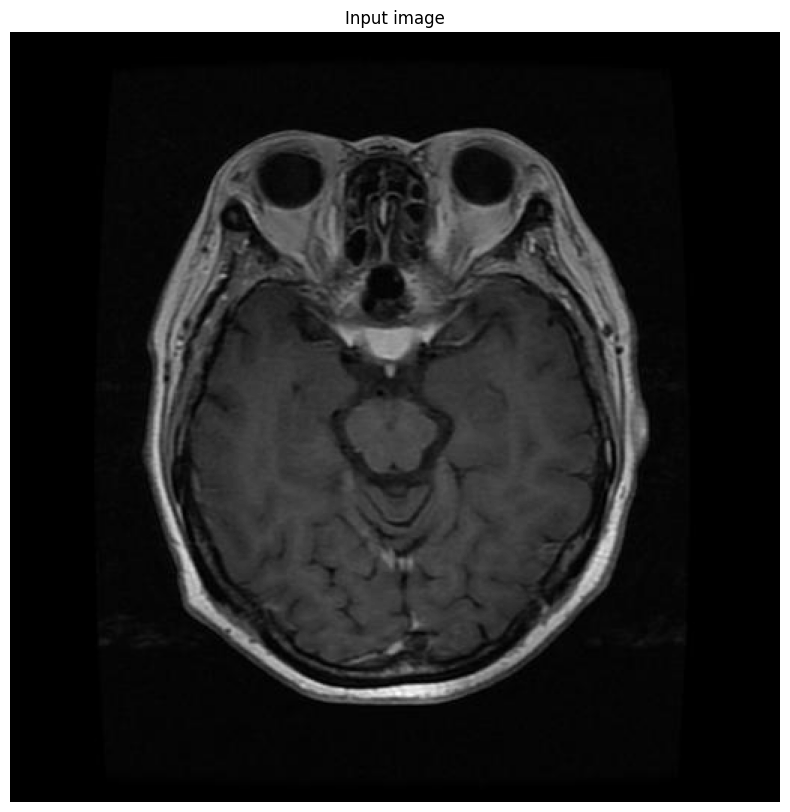

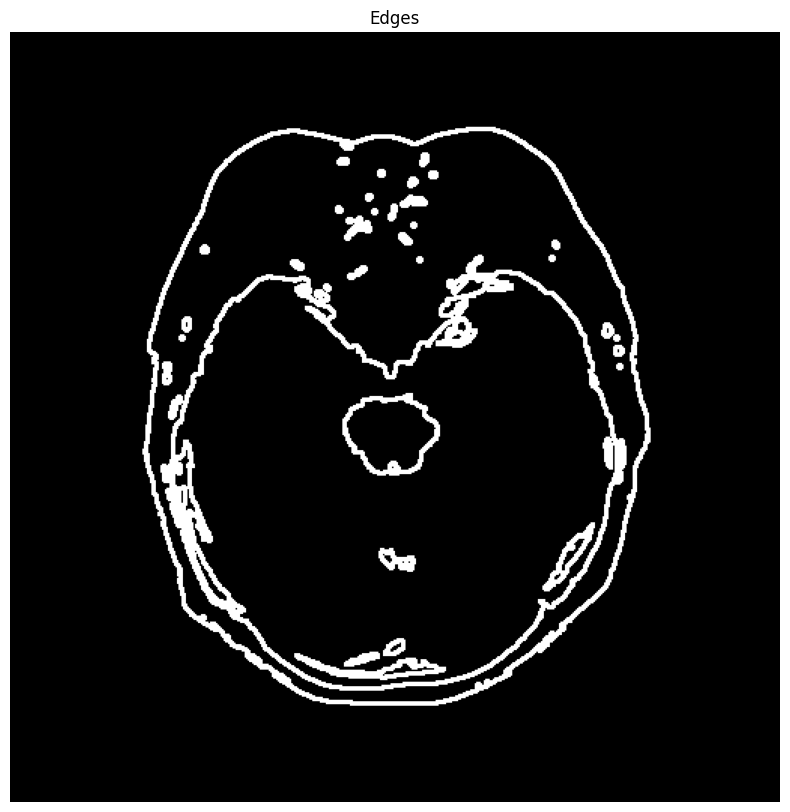

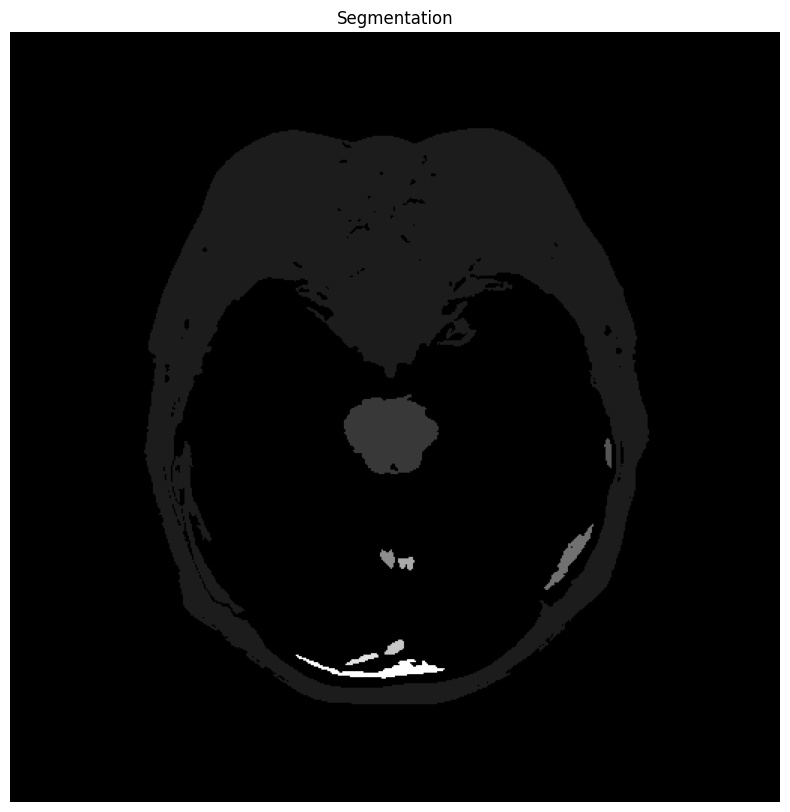

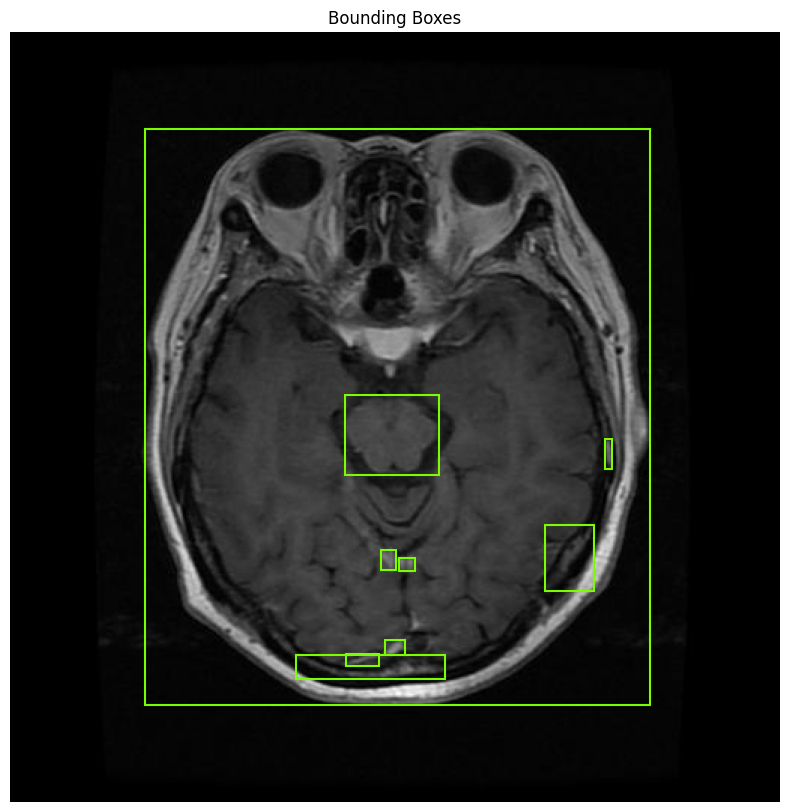

In [ ]:
img = cv2.imread(ejemplo_meningioma,0)

fig1, ax1 = plt.subplots(1, 1, figsize=(10, 10))
ax1.imshow(img, cmap='gray')
ax1.set_title('Input image')
ax1.axis('off')
plt.show()

mser_options = {
    'area': (60, 40000),  # Area of the ellipse (Max, Min)
    'min_div': 0.9,  # Minimal diversity
    'max_var': 0.2,  # Maximal variation
    'delta': 3,  # Delta
}

J, L, bboxes = seg_mser(img, **mser_options)

E = binary_dilation(find_boundaries(J, connectivity=1, mode='inner'), np.ones((3, 3)))

fig2, ax2 = plt.subplots(1, 1, figsize=(10, 10))
ax2.imshow(E, cmap='gray')
ax2.set_title('Edges')
ax2.axis('off')
plt.show()

fig3, ax3 = plt.subplots(1, 1, figsize=(10, 10))
ax3.imshow(L, cmap='gray')
ax3.set_title('Segmentation')
ax3.axis('off')
plt.show()

fig4, ax4 = plt.subplots(1, 1, figsize=(10, 10))
ax4.imshow(img, cmap='gray')
ax4 = plot_bboxes(bboxes, ax=ax4)
ax4.set_title('Bounding Boxes')
ax4.axis('off')
plt.show()




# **Region Creciente**

In [ ]:
import matplotlib.pylab as plt
import cv2
import numpy as np
from skimage.morphology import binary_dilation
from skimage.segmentation import clear_border
from skimage.color import label2rgb
from skimage.measure import label

In [ ]:
# (c) Christian Pieringer and Domingo Mery

def binview(img, mask, color='r', dilate_pixels=1):
    """
    Displays a gray or color image 'img' overlaid by color pixels determined a by binary image 'mask'. It is useful to
    display the edges of an image.

    Args:
        img: gray scale image (X-ray)
        mask: binary image that works as mask
        color: string to define pixel color.
                'r': red (default)
                'g': green
                'b': blue
                'y': yellow
                'c': cyan
                'm': magenta
                'k': black
                'w': white

        dilate_pixels (int): Number of pixels used for dilate the mask.

    Returns:
        img_color (ndarray): output image with a mask overlaid.
    """

    # Defines colors
    # colors = {
    #     'r': np.array([255, 0, 0]),
    #     'g': np.array([0, 255, 0]),
    #     'b': np.array([0, 0, 255]),
    #     'y': np.array([255, 255, 0]),
    #     'c': np.array([0, 255, 255]),
    #     'm': np.array([255, 0, 255]),
    #     'k': np.array([0, 0, 0]),
    #     'w': np.array([255, 255, 255])
    # }
    #
    colors = {
        'r': np.array([1, 0, 0]),
        'g': np.array([0, 1, 0]),
        'b': np.array([0, 0, 1]),
        'y': np.array([1, 1, 0]),
        'c': np.array([0, 1, 1]),
        'm': np.array([1, 0, 1]),
        'k': np.array([0, 0, 0]),
        'w': np.array([1, 1, 1])
    }
    # Create a RGB image from grayscale image.
    img_color = np.dstack((img, img, img))

    # Ensure do not modify the original color image and the mask
    img_color = img_color.copy()

    mask_ = mask.copy()
    # mask_ = dilate(mask_, np.ones((g, g), np.uint8))
    mask_ = binary_dilation(mask_, np.ones((dilate_pixels, dilate_pixels)))

    # Now black-out the area of the mask
    # img_fg = bitwise_and(img, img, mask=mask_)

    # Defines the pixel color used for the mask in the figure.
    cc = colors[color]
    #
    # for i in range(3):
    #     img_color[:, :, i] = cc[i] * img_fg

    # remove artifacts connected to image border
    cleared = clear_border(mask_)
    if np.all(cleared):
        mask_ = cleared

    # label image regions
    label_image = label(mask_)
    img_color = label2rgb(label_image, image=img_color, colors=[cc], bg_label=0)

    return img_color  # add(img_color, img_color)

In [ ]:
from skimage.morphology import flood
from skimage.morphology import binary_dilation

# (c) Christian Pieringer and Domingo Mery


def region_growing(img, seed_point, tolerance=20):
    """
    Args:
        img (ndarray): image
        seed_point (tuple): define the seed point.
        tolerance: a float or int value to define the maximal difference of grayvalues in the region. According to the
                   documentation in scikit-image, if tolerance is provided, adjacent points with values within plus
                   or minus tolerance from the seed point are filled (inclusive).

    Returns:
        mask (ndarray): output binary image
    """
    mask = flood(img, seed_point, tolerance=tolerance)
    mask = binary_dilation(mask, np.ones((3, 3)))

    return mask

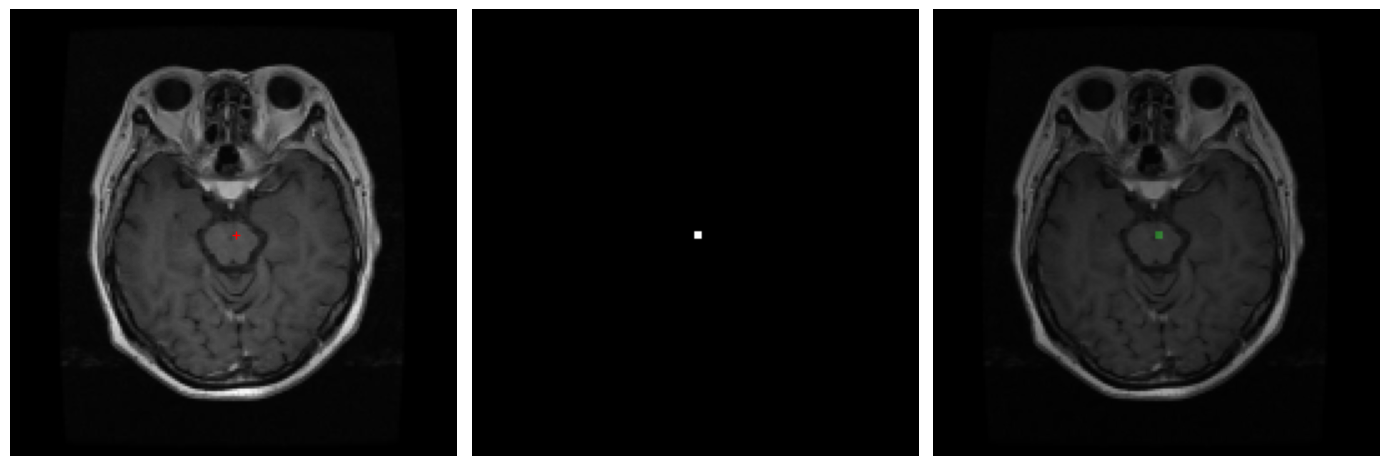

In [ ]:
img = cv2.imread(ejemplo_meningioma,0)
img = cv2.resize(img, None, fx=0.35, fy=0.35, interpolation=cv2.INTER_AREA)

th = 1  # threshold
si, sj = (90, 90)  # Coordenadas (y, x)

mask = region_growing(img, (si, sj), tolerance=th)

seg = binview(img, mask, 'g')

fig, ax = plt.subplots(1, 3, figsize=(14, 8))
ax[0].imshow(img, cmap='gray')
ax[0].plot(sj, si, 'r+')
ax[0].axis('off')
ax[1].imshow(mask, cmap='gray')
ax[1].axis('off')
ax[2].imshow(seg)
ax[2].axis('off')
plt.tight_layout()
plt.show()


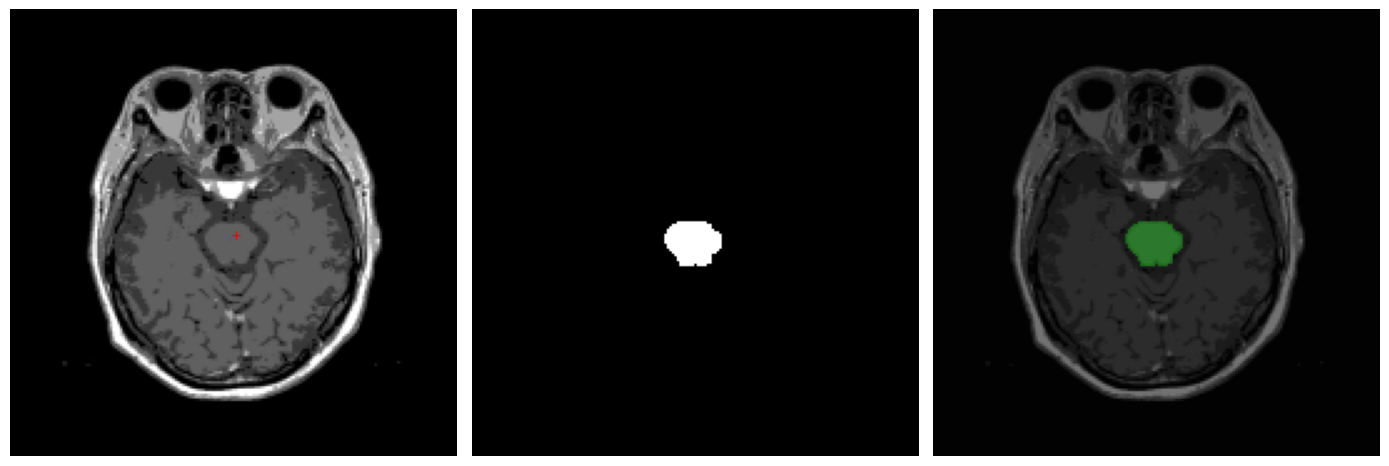

In [ ]:
img = cv2.imread("tumor_2.png",0)
img = cv2.resize(img, None, fx=0.35, fy=0.35, interpolation=cv2.INTER_AREA)

th = 1  # threshold
si, sj = (90, 90)  # Coordenadas (y, x)

mask = region_growing(img, (si, sj), tolerance=th)

seg = binview(img, mask, 'g')

fig, ax = plt.subplots(1, 3, figsize=(14, 8))
ax[0].imshow(img, cmap='gray')
ax[0].plot(sj, si, 'r+')
ax[0].axis('off')
ax[1].imshow(mask, cmap='gray')
ax[1].axis('off')
ax[2].imshow(seg)
ax[2].axis('off')
plt.tight_layout()
plt.show()